<a href="https://colab.research.google.com/github/dhyanendra-dhyani/time_table/blob/main/gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline(task='audio-classification', model='alefiury/wav2vec2-large-xlsr-53-gender-recognition-librispeech')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at alefiury/wav2vec2-large-xlsr-53-gender-recognition-librispeech were not used when initializing Wav2Vec2ForSequenceClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification 

In [ ]:
pip install pyctcdecode

In [ ]:
pip install kenlm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.4/427.4 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kenlm: filename=kenlm-0.2.0-cp310-cp310-linux_x86_64.whl size=3184465 sha256=26fe3d99d213cac6dd20b7e1318dea1b2d79394598f4471e5430c76474495577
  Stored in directory: /root/.cache/pip/wheels/fd/80/e0/18f4148e863fb137bd87e21ee2bf423b81b3ed6989dab95135
Successfully built kenlm


In [ ]:
test = "/content/neutralme.opus"
result = classifier(test)
print(result)

[{'score': 0.9987282156944275, 'label': 'male'}, {'score': 0.0012718259822577238, 'label': 'female'}]


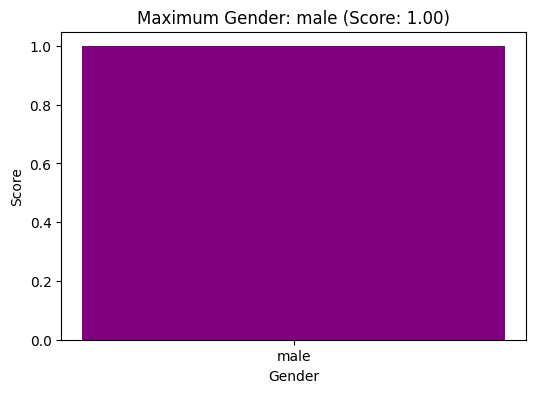

In [ ]:
import matplotlib.pyplot as plt

def plot_max_gender(result):
    labels = [entry['label'] for entry in result]
    scores = [entry['score'] for entry in result]

    max_index = scores.index(max(scores))

    max_label = labels[max_index]
    max_score = scores[max_index]

    plt.figure(figsize=(6, 4))
    plt.bar([max_label], [max_score], color='purple')


    plt.xlabel('Gender')
    plt.ylabel('Score')
    plt.title(f'Maximum Gender: {max_label} (Score: {max_score:.2f})')


    plt.show()


result = classifier(test)
plot_max_gender(result)
